# Bagging Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.show()

In [2]:
df=pd.read_csv('loan_data_set.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df["Dependent"] = df["Dependents"].replace("3+","3")

df["Dependent"].unique()

<ipython-input-7-af66e3b84897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dependent"] = df["Dependents"].replace("3+","3")


array(['1', '0', '2', '3'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]] = df[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]].apply(le.fit_transform)

df.head()

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
 13  Dependent          480 non-null    object 
dtypes: float64(4), int64(7), object(3)
memory usage: 56.2+ KB


In [10]:
x=df.drop(columns=["Loan_Status",'Loan_ID','Dependents'])
y=df["Loan_Status"]

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

accuracy is : 0.7604166666666666
              precision    recall  f1-score   support

           0       0.80      0.46      0.58        35
           1       0.75      0.93      0.83        61

    accuracy                           0.76        96
   macro avg       0.78      0.70      0.71        96
weighted avg       0.77      0.76      0.74        96



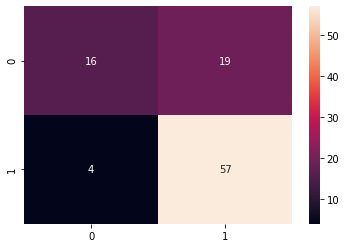

In [12]:
#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier

#making the bagging classifier with 100 decision trees
model=BaggingClassifier(n_estimators=100)

#fitting data to bagging model
model.fit(x_train,y_train)

#testing on test dataset 
y_pred=model.predict(x_test)

#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("accuracy is :",accuracy_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_pred))

### Parameter Tunning For Bagging Meta Estimator

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators = 100)

model.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.7708333333333334


[[15 20]
 [ 2 59]]


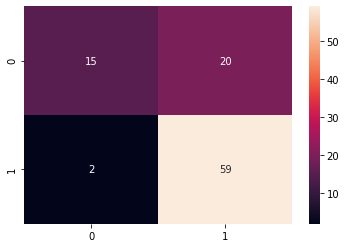

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot = True)
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.43      0.58        35
           1       0.75      0.97      0.84        61

    accuracy                           0.77        96
   macro avg       0.81      0.70      0.71        96
weighted avg       0.80      0.77      0.75        96



### Parameter Tunning For Random Forest